In [260]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
import warnings
warnings.filterwarnings("ignore")

In [262]:
data=pd.read_csv("Country-data.csv")

<h2>Data Inspection</h2>

In [263]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [264]:
data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [265]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [266]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [267]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [269]:
data.shape 

(167, 10)

<h2>Data Cleaning</h2>

In [270]:
# checking the null value counts
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Null values not present in the dataset

<h3>check for the outliers in the dataset</h3>

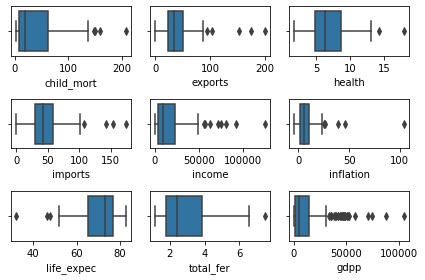

In [271]:

var=data.select_dtypes(exclude= "object")
plt.Figure(figsize=(16,12))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],data=data)
    plt.tight_layout()
#     print(i[0]+1)
#     print(i[1])
#         print(i)

We can see that outliers are present in the all numeric columns columns

<h3>Handling the outliers in each columns</h3>


In [272]:
for i in var:
    Q1=np.percentile(data[i],25,interpolation="midpoint")
    Q3=np.percentile(data[i],75,interpolation="midpoint")
    IQR=Q3-Q1
    UL=Q3+(1.5*IQR)
    LL=Q1-(1.5*IQR)
    data[i]=np.where(data[i]<LL,LL,np.where(data[i]>UL,UL,data[i]))

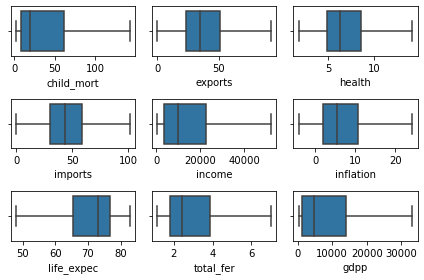

In [273]:
plt.Figure(figsize=(16,12))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],data=data)
    plt.tight_layout()

<h2>Univariate Analysis<h2>

In [274]:
# we will look for lowest 10 countries in each factors


Countries with high Child-Mortatlity, inflation & total fertility rate



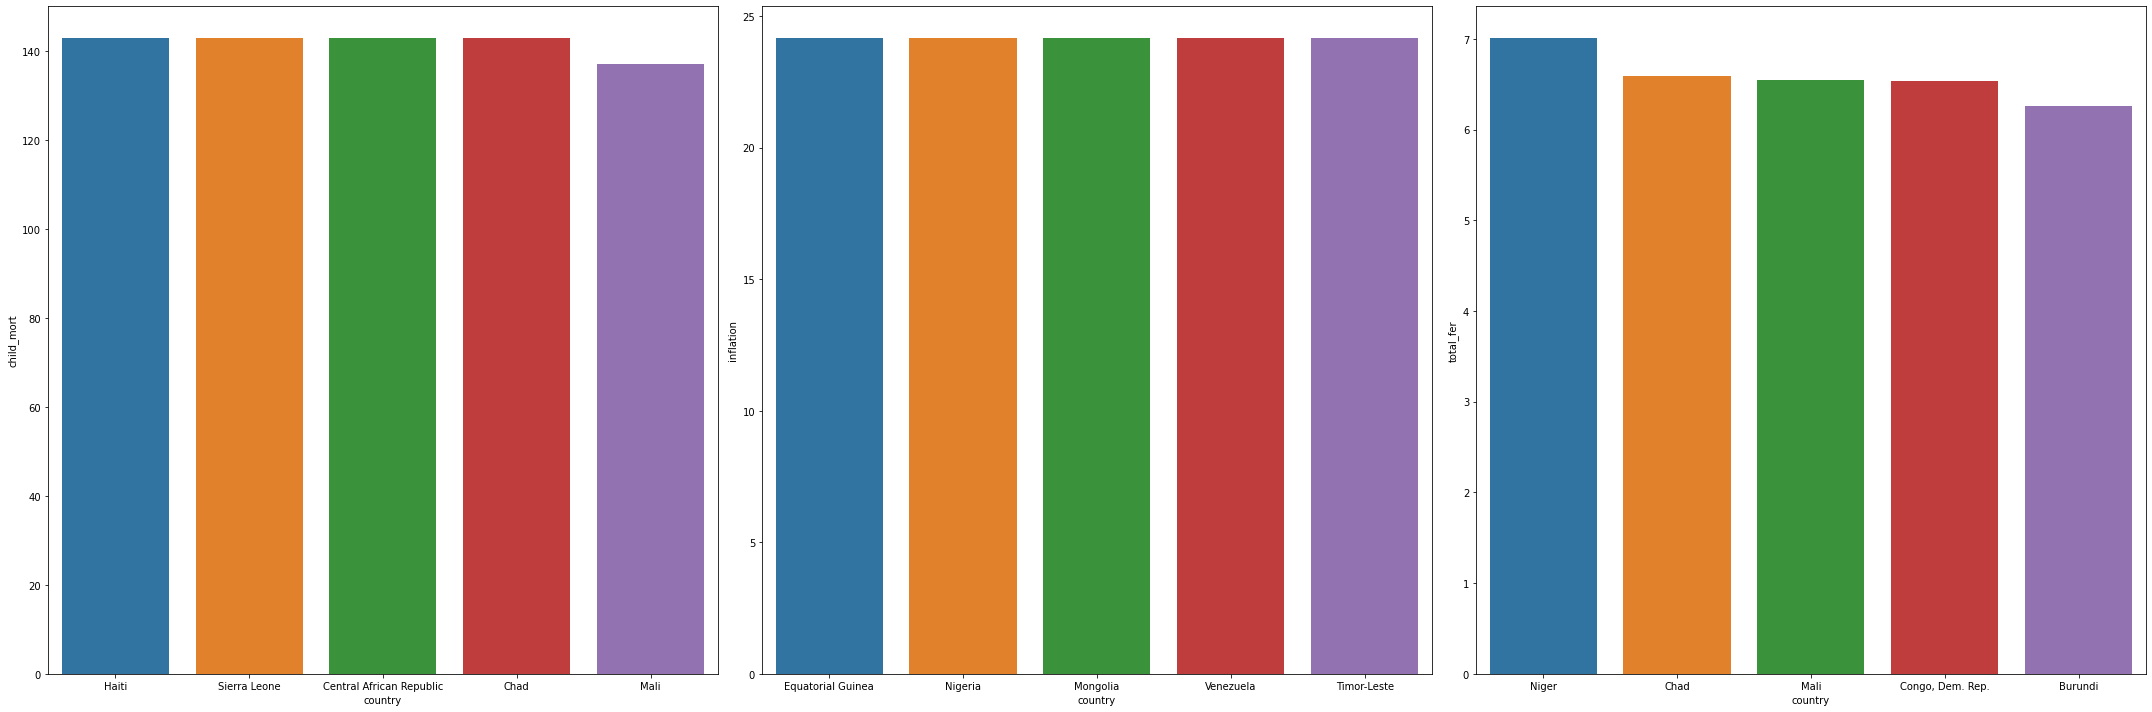

In [275]:
data[["country","child_mort"]].sort_values(by='child_mort', ascending = False).head(10)
top=["child_mort",'inflation','total_fer']
bottom=['exports','health','imports','income','life_expec','gdpp']
x=0
fig,my_grid=plt.subplots(1,3)
print("\nCountries with high Child-Mortatlity, inflation & total fertility rate\n")
for i in data[top]:
        fig.set_size_inches(30, 10)
        data_top=data[["country",i]].sort_values(by=i, ascending = False).head()
        sns.barplot(x="country",y=i,data=data_top,ax=my_grid[x])
        x=x+1
        plt.tight_layout()

plt.tight_layout()


Countries with low 'exports','health','imports','income','life_expec','gdpp'



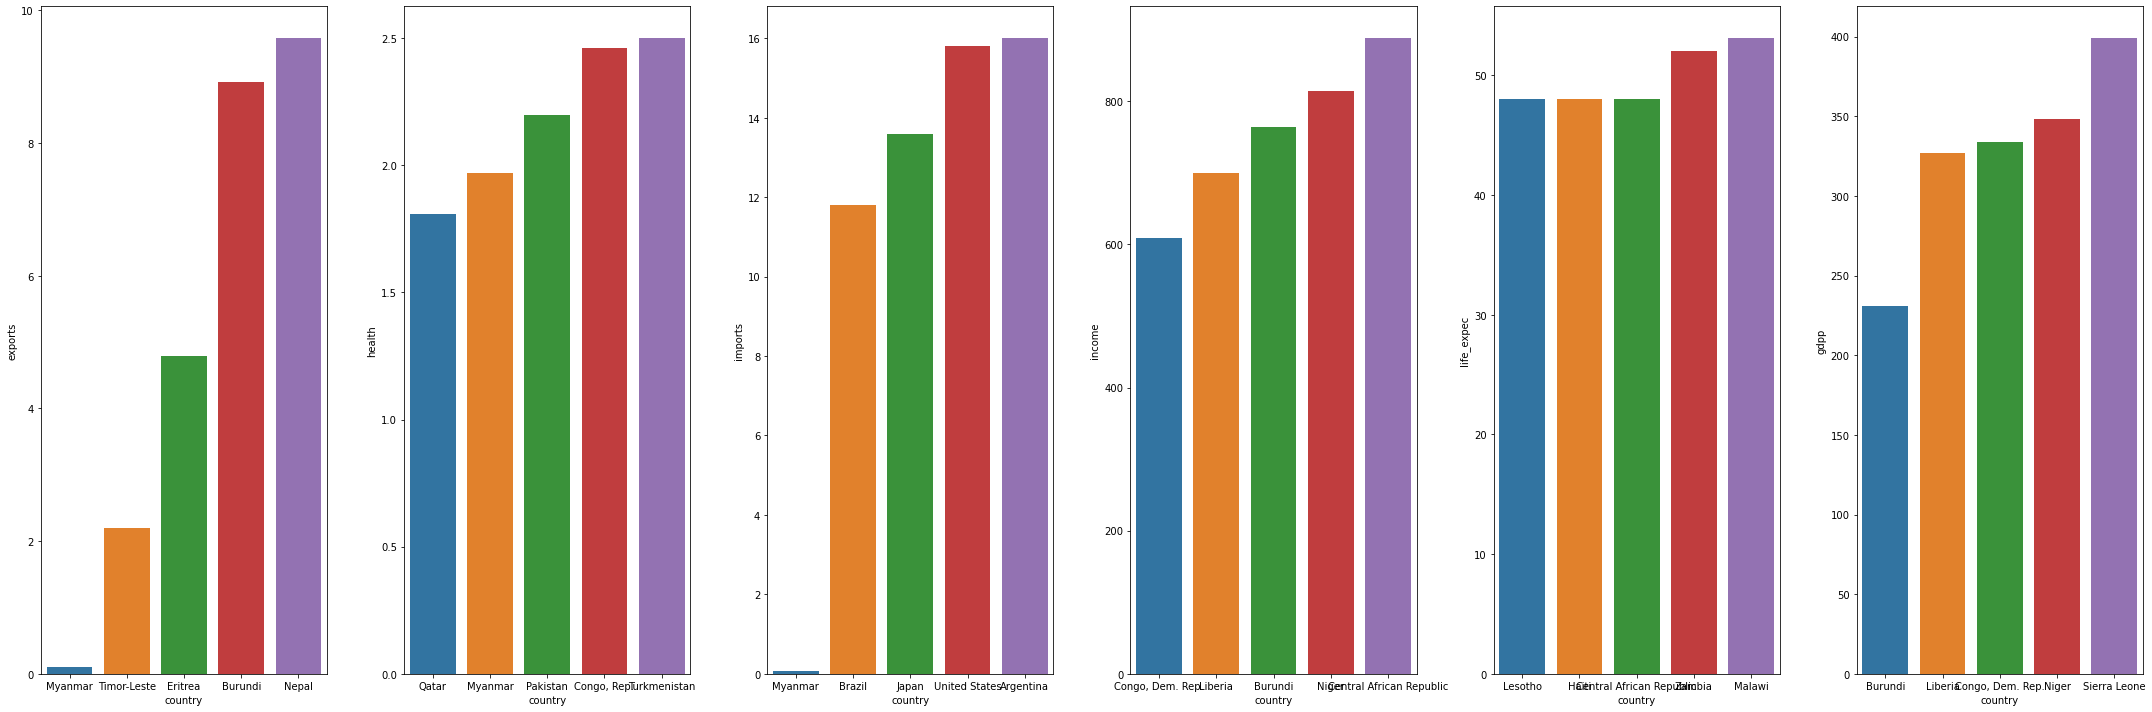

In [276]:
x=0
fig,my_grid=plt.subplots(1,6)
print("\nCountries with low 'exports','health','imports','income','life_expec','gdpp'\n")
for i in data[bottom]:
        fig.set_size_inches(30, 10)
        data_bottom=data[["country",i]].sort_values(by=i, ascending = True).head()
        sns.barplot(x="country",y=i,data=data_bottom,ax=my_grid[x])
        x=x+1
        plt.tight_layout()

plt.tight_layout()

<h3>Bivariate Analysis</h3>

Text(0.5, 1.0, 'child_mort vs total_fer')

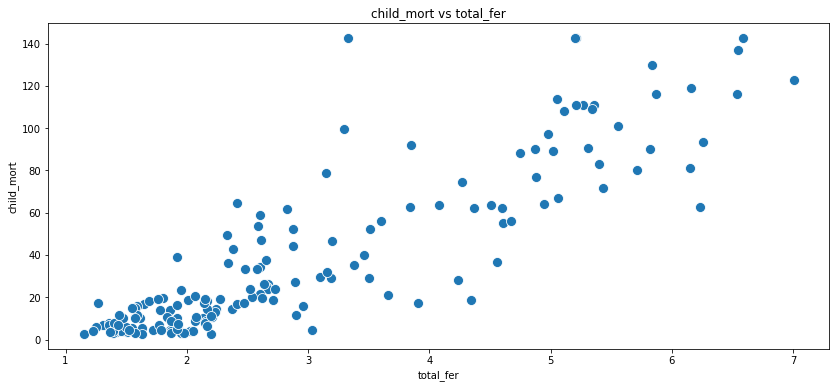

In [277]:
# we will the 
plt.figure(figsize=(14,6))
sns.scatterplot(y=data['child_mort'],x=data['total_fer'],s=100)
plt.title("child_mort vs total_fer")

Child mortality high for high Fertility Rate

<h2>Check the correlation between numerical features</h2>

In [278]:
corr=data.corr()


Text(0.5, 1.0, 'Correlation Matrix Plot')

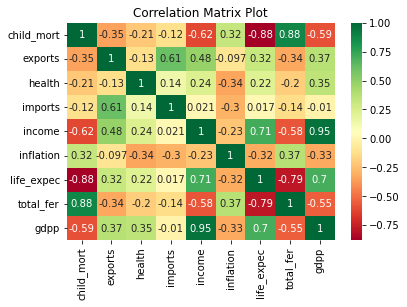

In [279]:
plt.Figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.title("Correlation Matrix Plot")

we can see that there are some fetaures with high correlation coeffiecient, so we will go for dimentionality reduction using PCA

In [191]:
#Taking a copy of the data
data_ref=data.copy()
data_ref

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


<h3>Scaling & Dimentionality reduction of the data<h3>

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
std=StandardScaler()

In [194]:
data_df=data.drop("country", axis=1)
columns=data_df.columns

In [195]:
# Check for the optimal no of dimentions needed using PCA

In [196]:
from sklearn.decomposition import PCA
pca=PCA(0.99)

In [211]:
pca.explained_variance_ratio_

array([0.48892383, 0.16452848, 0.13756787, 0.09504553, 0.0650032 ,
       0.02011842, 0.01655859, 0.00899467])

In [197]:
from sklearn.pipeline import make_pipeline

In [198]:
pipe=make_pipeline(std,pca)
# Transform the data here
x_pca=pipe.fit_transform(data_df)
x_pca.shape

(167, 8)

as per PCA calculation we need 8 principle components for 99% varience

In [201]:
# Create a dataframe with the PCs obtained
data_pc=pd.DataFrame(x_pca)
data_pc.head()

,0,1,2,3,4,5,6,7
0,-3.177917,-0.251292,-1.011474,0.778804,-0.014102,-0.249887,0.401482,0.423349
1,0.434979,-0.218700,-0.292591,-1.391241,0.156711,-0.095015,0.180859,-0.255277
2,-0.416784,-0.613870,1.637859,-0.615021,0.536604,-0.429119,-0.144657,-0.205779
3,-3.306409,1.066649,2.151219,1.698677,0.160551,-0.318015,-0.366271,-0.375098
4,1.253246,0.547778,-0.136955,-0.716890,-0.394628,-0.311152,0.143523,0.023079


Text(0.5, 1.0, 'Correlation Matrix Plot')

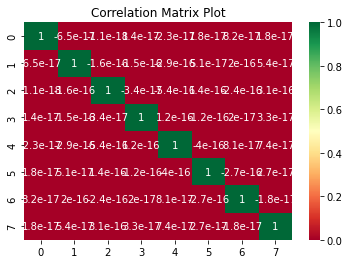

In [258]:
corr=data_pc.corr()
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.title("Correlation Matrix Plot")

</br>

<h2> KMeans Clustering<h2>

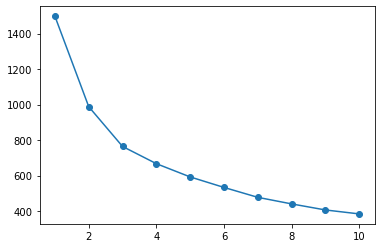

In [220]:
# first we ned to find optimal no of clusters using elbow plot
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(data_pc)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS,"-o")

In [221]:
#optimal value of cluster=5

<h3>Creating the Model</h3>

In [225]:
model_kmeans=KMeans()
model_kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
labels=model_kmeans.fit_predict(data_pc)
labels

array([1, 3, 0, 1, 3, 0, 0, 4, 4, 0, 4, 2, 0, 3, 3, 2, 3, 1, 3, 0, 3, 3,
       0, 4, 3, 1, 1, 3, 1, 4, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 4, 2,
       4, 0, 0, 0, 3, 1, 1, 2, 3, 4, 4, 0, 1, 3, 4, 1, 4, 3, 0, 1, 1, 3,
       1, 2, 4, 0, 0, 0, 0, 2, 4, 4, 0, 4, 3, 0, 1, 1, 4, 3, 1, 3, 3, 1,
       1, 0, 3, 2, 3, 1, 1, 2, 3, 1, 2, 1, 3, 3, 3, 0, 3, 3, 1, 0, 3, 0,
       2, 4, 1, 1, 4, 0, 1, 3, 3, 0, 0, 3, 4, 4, 3, 0, 1, 3, 0, 1, 3, 2,
       1, 2, 2, 2, 3, 1, 4, 4, 0, 3, 1, 3, 4, 4, 0, 1, 3, 1, 1, 3, 3, 0,
       3, 1, 3, 2, 4, 4, 0, 0, 3, 0, 3, 0, 1])

In [254]:
from sklearn.metrics import silhouette_score
model_kmeans
score = silhouette_score(data_pc, model_kmeans.labels_, metric='euclidean')
print('Silhouetter Score: ',score)

Silhouetter Score:  0.24745584760021758


<h3>Mapping the cluster values with dataframe</h3>

In [229]:
clusterCut=pd.Series(labels)

In [233]:
df_pca_hc = pd.concat([data_pc, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","ClusterID"]
df_pca_hc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,ClusterID
0,-3.177917,-0.251292,-1.011474,0.778804,-0.014102,-0.249887,0.401482,0.423349,1
1,0.434979,-0.218700,-0.292591,-1.391241,0.156711,-0.095015,0.180859,-0.255277,3
2,-0.416784,-0.613870,1.637859,-0.615021,0.536604,-0.429119,-0.144657,-0.205779,0
3,-3.306409,1.066649,2.151219,1.698677,0.160551,-0.318015,-0.366271,-0.375098,1
4,1.253246,0.547778,-0.136955,-0.716890,-0.394628,-0.311152,0.143523,0.023079,3
...,...,...,...,...,...,...,...,...,...
162,-0.882087,0.945856,-0.227550,-0.680105,-0.551247,0.175948,-0.277978,0.705125,3
163,-0.240053,-1.742315,2.238331,-0.080500,1.318475,-0.088591,0.224814,-0.023780,0
164,0.305579,2.152785,0.455745,-0.746171,1.383759,0.014034,-0.261464,-0.325053,3
165,-2.271105,-0.554296,1.524967,0.313639,1.295477,-0.542778,0.063108,0.072193,0


In [238]:
pca_cluster_hc = pd.concat([data['country'],df_pca_hc], axis=1, join='outer')
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,ClusterID
0,Afghanistan,-3.177917,-0.251292,-1.011474,0.778804,-0.014102,-0.249887,0.401482,0.423349,1
1,Albania,0.434979,-0.218700,-0.292591,-1.391241,0.156711,-0.095015,0.180859,-0.255277,3
2,Algeria,-0.416784,-0.613870,1.637859,-0.615021,0.536604,-0.429119,-0.144657,-0.205779,0
3,Angola,-3.306409,1.066649,2.151219,1.698677,0.160551,-0.318015,-0.366271,-0.375098,1
4,Antigua and Barbuda,1.253246,0.547778,-0.136955,-0.716890,-0.394628,-0.311152,0.143523,0.023079,3


In [239]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,3,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,0,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,1,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,3,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [240]:
# Calculate the feature mean values for each clusters

In [243]:
hc_child_mort=pd.DataFrame(clustered_data_hc.groupby("ClusterID")["child_mort"].mean())
hc_exports=pd.DataFrame(clustered_data_hc.groupby("ClusterID")["exports"].mean())
hc_health=pd.DataFrame(clustered_data_hc.groupby("ClusterID")["health"].mean())
hc_imports=pd.DataFrame(clustered_data_hc.groupby("ClusterID")["imports"].mean())
hc_income=pd.DataFrame(clustered_data_hc.groupby("ClusterID")["income"].mean())
hc_inflation=pd.DataFrame(clustered_data_hc.groupby("ClusterID")["inflation"].mean())
hc_life_expec=pd.DataFrame(clustered_data_hc.groupby("ClusterID")["life_expec"].mean())
hc_total_fer=pd.DataFrame(clustered_data_hc.groupby("ClusterID")["total_fer"].mean())
hc_gdpp=pd.DataFrame(clustered_data_hc.groupby("ClusterID")["gdpp"].mean())

In [244]:
df=pd.concat([pd.Series(list(range(0,5))), hc_child_mort,hc_exports, hc_health, hc_imports,
               hc_income, hc_inflation, hc_life_expec,hc_total_fer,hc_gdpp], axis=1)

In [245]:
df.head()

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,29.194595,30.332135,5.321081,29.480159,13062.432432,12.497568,72.240541,2.604865,6219.351351
1,1,95.435714,27.419286,6.383095,42.614286,3117.928571,9.826786,59.203571,5.121607,1529.809524
2,2,5.946667,80.625000,7.202000,77.693333,35086.833333,2.136667,77.920000,1.711333,23196.666667
3,3,20.861702,44.768085,6.958511,58.053191,10538.297872,4.294234,72.012766,2.299787,5644.170213
4,4,5.284615,39.092308,9.011923,34.019231,39347.596154,2.725077,80.307692,1.791538,31579.615385


In [249]:
#Cluster with ClusterID as 1, is the cluster of most backward country.
#Countries on which we require to focus more are

In [246]:
clustered_data_hc[clustered_data_hc.ClusterID == 1].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lao', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Zambia'], dtype=object)

In [ ]:
#Cluster with ClusterID as 1, is the cluster of most backward country.
# #Countries on which we require to focus more are 
#        ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
#        'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
#        'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
#        'Equatorial Guinea', 'Eritrea', 'Gambia', 'Ghana', 'Guinea',
#        'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lao', 'Lesotho',
#        'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
#        'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
#        'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
#        'Togo', 'Uganda', 'Zambia']
